In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
url=r"C:\Users\sankara subramanian\Downloads\sample_airbnb.json"
data=pd.read_json(url)
data        

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",NaN,NaN,NaN
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",NaN,NaN,NaN
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,"Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,NaN,NaN
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,NaN
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51303748', 'host_u

In [3]:
airbnb=pd.DataFrame(data)

In [4]:
airbnb.drop(columns=['summary','notes'],inplace=True)

In [5]:
airbnb['cancellation_policy']=airbnb['cancellation_policy'].str.replace('_',' ')
airbnb['cancellation_policy']=airbnb['cancellation_policy'].str.capitalize()
airbnb['cancellation_policy'].unique()

array(['Strict 14 with grace period', 'Moderate', 'Flexible',
       'Super strict 30', 'Super strict 60'], dtype=object)

In [6]:
host=pd.json_normalize(airbnb['host'])
airbnb=pd.concat([airbnb,host],axis=1)
airbnb.drop(columns=['host','host_url','host_verifications','host_identity_verified','host_has_profile_pic','host_is_superhost','host_response_rate','host_neighbourhood','host_picture_url','host_thumbnail_url','host_response_time','images'],inplace=True)



In [7]:
airbnb['last_review'].isnull().sum()

1388

In [8]:
airbnb.drop(columns=['first_review','last_review'],inplace=True)

In [9]:
name = airbnb[airbnb['host_name']=='Karen']
name

,_id,listing_url,name,space,description,neighborhood_overview,transit,access,interaction,house_rules,...,reviews,weekly_price,monthly_price,reviews_per_month,host_id,host_name,host_location,host_about,host_listings_count,host_total_listings_count
134,10887852,https://www.airbnb.com/rooms/10887852,Cozy Hell's Kitchen Apt,"Clean, Small 1 bedroom apartment, located on t...",1 bedroom Apt in Hell's Kitchen/Midtown West a...,"2 Avenues away from subways, 10 min walk to Ce...",C & E subway lines located two avenues away. ...,Private bedroom is yours for the entire stay ...,I'm always available by phone for any questions.,Please do not leave dirty dishes . Lost Key is...,...,"[{'_id': '102577200', 'date': '2016-09-18 04:0...",NaN,NaN,NaN,39754804,Karen,"New York, New York, United States",,1,1
147,1089542,https://www.airbnb.com/rooms/1089542,Private Cozy Bedroom in Brooklyn,"To yourself, you'll have a cozy room furnished...",Your private room is located in our family's l...,Please check our Guidebook to see recommendati...,Our apartment is one block away from the 2 and...,Our home includes: - high-speed Wi-Fi - large ...,We have been hosting on Airbnb since 2011 and ...,"Our apt is 2k. When you arrive, buzz 2k from t...",...,"[{'_id': '4230259', 'date': '2013-04-20 04:00:...",NaN,NaN,NaN,663764,Karen,"New York, New York, United States",Joshua is a writer originally from the Atlanti...,2,2
240,1132409,https://www.airbnb.com/rooms/1132409,Amazing Upper West Side Loft-Studio,This is an Large Space - Loft Like (about 500 ...,This is an Large Space - Loft Like (about 500 ...,,,,,No Pets or Smoking are allowed!,...,"[{'_id': '5167421', 'date': '2013-06-16 04:00:...",NaN,3250.0,NaN,3038687,Karen,"New York, New York, United States",My husband and I live here and love our apartm...,8,8
781,14236416,https://www.airbnb.com/rooms/14236416,"the shoebox, west chelsea",a few more details.... there is no bathtub but...,"At 180 sq ft, ""the shoebox"" is aptly named, bu...",IMO there is no better neighborhood in Manhatt...,,upon entry of building there is an open stairc...,I am very responsive and just a text message a...,please be discreet. Airbnb is controversial in...,...,"[{'_id': '100495654', 'date': '2016-09-09 04:0...",NaN,NaN,NaN,20132009,Karen,"New York, New York, United States","my home reflects my love of art, design and al...",4,4
2980,24972885,https://www.airbnb.com/rooms/24972885,Large Luxury Hong Kong Island apartment,,"Fully renovated building with beautiful pool, ...",Pokfulam is a quiet neighbourhood yet only ten...,,,,,...,"[{'_id': '312154838', 'date': '2018-08-23 04:0...",NaN,NaN,NaN,54807073,Karen,Hong Kong,,1,1
3263,2711936,https://www.airbnb.com/rooms/2711936,light sunny room 2 min to beach.,The building has 6 apartments .Each apartment ...,Light filled freshly painted sunny bedroom ha...,Friendly and pleasant neighbours. Excellent fa...,Transport couldn't be more convenient. There's...,Shared laundry downstairs,Happy to spend a morning showing my guest the...,No smoking and no pets are allowed in the buil...,...,"[{'_id': '24984077', 'date': '2015-01-04 05:00...",NaN,NaN,NaN,13879827,Karen,"Bondi Beach, New South Wales, Australia",I am an English teacher who has taught studen...,1,1
5215,8118147,https://www.airbnb.com/rooms/8118147,Bamboo Bungalow with Ocean View,,,,,,,,...,[],500.0,1000.0,NaN,22045751,Karen,"Pāhoa, Hawaii, United States",You can contact me if you think about this. Ei...,2,2
5220,808705,https://www.airbnb.com/rooms/808705,ONE BED/ LUXURY @ COLUMBUS CIRCLE!,Columbus Circle with River VIEWS from a PRIVAT...,Columbus Circle with River VIEWS from a PRIVAT...,,,,,Pets and smoking inside the apartment are not ...,...,"[{'_id': '3650034', 'date': '2013-02-27 05:00:...",NaN,3950.0,NaN,3038687,Karen,"New York, New York, United States",My husband and I live here and love our apartm...,8,8
5279,8408379,https://www.airbnb.com/rooms/8408379,Rustic Home in Perfect Location,Your bedroom is quiet and peaceful. The house ...,En

In [10]:
null=airbnb[airbnb['bedrooms'].isnull()]
null

,_id,listing_url,name,space,description,neighborhood_overview,transit,access,interaction,house_rules,...,reviews,weekly_price,monthly_price,reviews_per_month,host_id,host_name,host_location,host_about,host_listings_count,host_total_listings_count
240,1132409,https://www.airbnb.com/rooms/1132409,Amazing Upper West Side Loft-Studio,This is an Large Space - Loft Like (about 500 ...,This is an Large Space - Loft Like (about 500 ...,,,,,No Pets or Smoking are allowed!,...,"[{'_id': '5167421', 'date': '2013-06-16 04:00:...",NaN,3250.0,NaN,3038687,Karen,"New York, New York, United States",My husband and I live here and love our apartm...,8,8
1275,16796969,https://www.airbnb.com/rooms/16796969,Modern room near the beach.Amazing location!,,Enjoy our amazing apartment while we are away....,,,,,,...,[],NaN,NaN,NaN,53764859,Lu,AU,,1,1
1399,17435095,https://www.airbnb.com/rooms/17435095,The Porto Concierge - Marques House | 402,"Within a building, this room is on the 4th flo...","Room in renovated house, located in Marques ar...","In downtown city centre, within 3 minutes walk...",There are some options for you to come from th...,Guests have access to all the amenities of the...,When you arrive you will be met by Concierge S...,"- Smoking is not allowed inside the apartment,...",...,"[{'_id': '138897991', 'date': '2017-03-22 04:0...",NaN,NaN,NaN,117930909,Beatriz,PT,,14,14
3278,2682827,https://www.airbnb.com/rooms/2682827,,,Sultanahmet room in hotel at the old city . Lo...,,,,,,...,"[{'_id': '21485606', 'date': '2014-10-18 04:00...",2502.0,8934.0,NaN,13733426,Saim,"Fatih, Istanbul Province, Turkey",,2,2
4170,31486435,https://www.airbnb.com/rooms/31486435,Ataşehir,,Ataşehirde site ortamında otoparklı asansörlü ...,,,,,,...,[],NaN,NaN,NaN,235894250,Günay,"Ataşehir, Istanbul, Turkey",,1,1


In [11]:
airbnb['bedrooms'][2000]

2.0

In [12]:
airbnb['bedrooms'].mode()[0]

1.0

In [13]:

airbnb['bedrooms']= airbnb['bedrooms'].fillna(1.0)

In [14]:
airbnb['bedrooms']=airbnb['bedrooms'].astype('int')

In [15]:
airbnb['beds']= airbnb['beds'].fillna(2)
airbnb['beds']=airbnb['beds'].astype('int')
airbnb['beds'].isnull().sum()


0

In [16]:
airbnb.drop(columns=['weekly_price','monthly_price','reviews_per_month','host_about','host_listings_count'],inplace=True)

In [17]:
bed=airbnb[airbnb['beds']==0]
bed.loc[20:101,'beds']

101    0
Name: beds, dtype: int32

In [18]:
for i in airbnb['amenities'].loc[0]:
    print(i)

Internet
Wifi
Air conditioning
Kitchen
Elevator
Buzzer/wireless intercom
Heating
Family/kid friendly
Washer
Dryer
translation missing: en.hosting_amenity_50


In [73]:
airbnb['Amenities'] = airbnb['Amenities'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
airbnb['Amenities']

0       Internet,Wifi,Air conditioning,Kitchen,Elevato...
1       Internet,Wifi,Air conditioning,Free parking on...
2       Air conditioning,Kitchen,Smoking allowed,Doorm...
3       TV,Wifi,Air conditioning,Kitchen,Elevator,Firs...
4       TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer,...
                              ...                        
5550    TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wirel...
5551    TV,Wifi,Air conditioning,Pool,Kitchen,Free par...
5552    TV,Wifi,Air conditioning,Kitchen,Elevator,Hot ...
5553    TV,Internet,Wifi,Kitchen,Washer,Dryer,Smoke de...
5554    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: Amenities, Length: 5555, dtype: object

In [19]:
airbnb['security_deposit'].mean()




509.4304235090752

In [20]:
airbnb['security_deposit']=airbnb['security_deposit'].fillna(509.4)
airbnb['security_deposit']=airbnb['security_deposit'].astype('int')
airbnb['security_deposit'].isnull().sum()


0

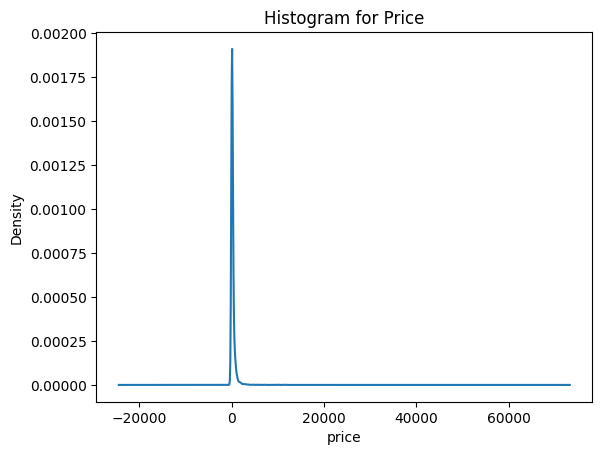

In [21]:
import matplotlib.pyplot as plt

airbnb['price'].plot(kind='density')
plt.title(f'Histogram for Price')
plt.xlabel('price')
plt.ylabel=('Frequency')
plt.show()

In [22]:
country=pd.json_normalize(airbnb['address'])
airbnb=pd.concat([airbnb,country],axis=1)



In [23]:
airbnb.drop(columns='address',inplace=True)

In [24]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         5555 non-null   int64  
 1   listing_url                 5555 non-null   object 
 2   name                        5555 non-null   object 
 3   space                       5555 non-null   object 
 4   description                 5555 non-null   object 
 5   neighborhood_overview       5555 non-null   object 
 6   transit                     5555 non-null   object 
 7   access                      5555 non-null   object 
 8   interaction                 5555 non-null   object 
 9   house_rules                 5555 non-null   object 
 10  property_type               5555 non-null   object 
 11  room_type                   5555 non-null   object 
 12  bed_type                    5555 non-null   object 
 13  minimum_nights              5555 

In [25]:
airbnb.iloc[:,35:46]

,host_total_listings_count,street,suburb,government_area,market,country,country_code,location.type,location.coordinates,location.is_location_exact
0,3,"New York, NY, United States",Manhattan,Upper West Side,New York,United States,US,Point,"[-73.96523, 40.79962]",False
1,2,"Fatih , İstanbul, Turkey",Fatih,Fatih,Istanbul,Turkey,TR,Point,"[28.98009, 41.0062]",False
2,1,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Central & Western,Hong Kong,Hong Kong,HK,Point,"[114.15027, 22.28158]",True
3,2,"Hong Kong , 九龍, Hong Kong",Sham Shui Po District,Sham Shui Po,Hong Kong,Hong Kong,HK,Point,"[114.1669, 22.3314]",True
4,1,"Surry Hills, NSW, Australia",Darlinghurst,Sydney,Sydney,Australia,AU,Point,"[151.21554, -33.88029]",True
...,...,...,...,...,...,...,...,...,...,...
5550,2,"Kadıköy, İstanbul, Turkey",Moda,Kadikoy,Istanbul,Turkey,TR,Point,"[29.03079, 40.98563]",False
5551,58,"Lahaina, HI, United States",Lahaina,Lahaina,Maui,United States,US,Point,"[-156.66752, 20.85894]",False
5552,7,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Eastern,Hong Kong,Hong Kong,HK,Point,"[114.20722, 22.29157]",False
5553,1,"Bondi Beach, NSW, Australia",Bondi,Waverley,Sydney,Australia,AU,Point,"[151.26542, -33.89298]",False


In [26]:
airbnb.drop(columns=['location.type','market','government_area','location.is_location_exact'],inplace=True)

In [27]:
airbnb['location.coordinates']=airbnb['location.coordinates'].astype('str')

In [28]:
airbnb['location.coordinates']=airbnb['location.coordinates'].str.strip('[]')
airbnb[['latitude','longitude']]= airbnb['location.coordinates'].str.split(',',expand=True)


In [29]:
airbnb['longitude'].astype('float')

0       40.799620
1       41.006200
2       22.281580
3       22.331400
4      -33.880290
          ...    
5550    40.985630
5551    20.858940
5552    22.291570
5553   -33.892980
5554   -22.908336
Name: longitude, Length: 5555, dtype: float64

In [30]:
airbnb['latitude'].astype('float')

0       -73.965230
1        28.980090
2       114.150270
3       114.166900
4       151.215540
           ...    
5550     29.030790
5551   -156.667520
5552    114.207220
5553    151.265420
5554    -43.173761
Name: latitude, Length: 5555, dtype: float64

In [31]:
airbnb.drop(columns=['location.coordinates'],inplace=True)

In [32]:
availability=pd.json_normalize(airbnb['availability'])
airbnb=pd.concat([airbnb,availability],axis=1)
airbnb.drop(columns=['availability','availability_30','availability_60','availability_90'],inplace=True)


In [33]:
airbnb['review_scores'][0]

{'review_scores_accuracy': 10,
 'review_scores_cleanliness': 9,
 'review_scores_checkin': 10,
 'review_scores_communication': 10,
 'review_scores_location': 10,
 'review_scores_value': 10,
 'review_scores_rating': 94}

In [34]:
rating=pd.json_normalize(airbnb['review_scores'])
airbnb=pd.concat([airbnb,rating],axis=1)
airbnb.drop(columns=['review_scores','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],inplace=True)

In [35]:
airbnb.drop(columns=['space','transit','access','interaction','last_scraped','calendar_last_scraped','neighborhood_overview','reviews'],inplace=True)

In [36]:
airbnb['bathrooms'].mean()

1.2911632100991886

In [37]:
airbnb['bathrooms']=airbnb['bathrooms'].fillna(1)
airbnb['bathrooms'].astype('int')


0       1
1       1
2       1
3       1
4       1
       ..
5550    1
5551    2
5552    1
5553    1
5554    2
Name: bathrooms, Length: 5555, dtype: int32

In [38]:
airbnb['cleaning_fee']

0       135.0
1         NaN
2         NaN
3        50.0
4        50.0
        ...  
5550      NaN
5551    315.0
5552      NaN
5553     50.0
5554      NaN
Name: cleaning_fee, Length: 5555, dtype: float64

In [39]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [40]:
airbnb.rename(columns={'Entire home/apt':'Entire place'},inplace=True)

In [41]:
# Impute price based on conditions
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire place'), 'price'] = 314.8
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Private Room'), 'price'] = 212.2
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Shared room'), 'price'] = 349.5

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\1876324839.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '314.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire place'), 'price'] = 314.8


In [42]:
airbnb[airbnb['cleaning_fee'].isna()].astype('str')

,_id,listing_url,name,description,house_rules,property_type,room_type,bed_type,minimum_nights,maximum_nights,...,host_location,host_total_listings_count,street,suburb,country,country_code,latitude,longitude,availability_365,review_scores_rating
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,,Bed and breakfast,Private room,Real Bed,1,1125,...,"Istanbul, İstanbul, Turkey",2,"Fatih , İstanbul, Turkey",Fatih,Turkey,TR,28.98009,41.0062,365,92.0
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,Apartment,Entire home/apt,Real Bed,4,20,...,"Hong Kong, Hong Kong",1,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Hong Kong,HK,114.15027,22.28158,0,100.0
7,10140368,https://www.airbnb.com/rooms/10140368,A bedroom far away from home,"NOTES: BEFORE BOOKING, PLEASE KNOW THAT WE ARE...",No shoes allowed inside the apartment. Be poli...,Apartment,Private room,Real Bed,1,10,...,US,1,"Queens, NY, United States",Queens,United States,US,-73.82257,40.71485,34,95.0
8,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Apartment,Private room,Real Bed,14,1125,...,"New York, New York, United States",1,"Brooklyn, NY, United States",Brooklyn,United States,US,-73.93615,40.69791,0,100.0
10,10059244,https://www.airbnb.com/rooms/10059244,Ligne verte - à 15 min de métro du centre ville.,À 30 secondes du métro Joliette. Belle grande ...,Non fumeur Respect des voisins Respect des bie...,Apartment,Entire home/apt,Real Bed,2,1125,...,"Montreal, Quebec, Canada",1,"Montréal, Québec, Canada",Hochelaga-Maisonneuve,Canada,CA,-73.54949,45.54548,32,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,9937100,https://www.airbnb.com/rooms/9937100,Frida's Centric&Stylish Studio Apt.,Unique loft apartment with a Frida Kahlo decor...,Our standard check-in time is from 2 pm but we...,Loft,Entire home/apt,Real Bed,31,365,...,"Barcelona, Cataluña, Spain",14,"Barcelona, Catalunya, Spain",Ciutat Vella,Spain,ES,2.17304,41.38779,305,96.0
5540,9979991,https://www.airbnb.com/rooms/9979991,,"Located at the heart of Kowloon, our unit is s...",,Apartment,Entire home/apt,Real Bed,1,1125,...,Hong Kong,1,"Hong Kong, Kowloon, Hong Kong",Mong Kok,Hong Kong,HK,114.16963,22.31569,0,nan
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,House,Entire home/apt,Real Bed,1,1125,...,"Kadikoy, Çanakkale, Turkey",2,"Kadıköy, İstanbul, Turkey",Moda,Turkey,TR,29.03079,40.98563,365,nan
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,,Apartment,Private room,Real Bed,3,1125,...,Hong Kong,7,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Hong Kong,HK,114.20722,22.29157,353,85.0


In [43]:
airbnb[airbnb['cleaning_fee'].isna()].fillna(0)

,_id,listing_url,name,description,house_rules,property_type,room_type,bed_type,minimum_nights,maximum_nights,...,host_location,host_total_listings_count,street,suburb,country,country_code,latitude,longitude,availability_365,review_scores_rating
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,,Bed and breakfast,Private room,Real Bed,1,1125,...,"Istanbul, İstanbul, Turkey",2,"Fatih , İstanbul, Turkey",Fatih,Turkey,TR,28.98009,41.0062,365,92.0
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,Apartment,Entire home/apt,Real Bed,4,20,...,"Hong Kong, Hong Kong",1,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Hong Kong,HK,114.15027,22.28158,0,100.0
7,10140368,https://www.airbnb.com/rooms/10140368,A bedroom far away from home,"NOTES: BEFORE BOOKING, PLEASE KNOW THAT WE ARE...",No shoes allowed inside the apartment. Be poli...,Apartment,Private room,Real Bed,1,10,...,US,1,"Queens, NY, United States",Queens,United States,US,-73.82257,40.71485,34,95.0
8,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Apartment,Private room,Real Bed,14,1125,...,"New York, New York, United States",1,"Brooklyn, NY, United States",Brooklyn,United States,US,-73.93615,40.69791,0,100.0
10,10059244,https://www.airbnb.com/rooms/10059244,Ligne verte - à 15 min de métro du centre ville.,À 30 secondes du métro Joliette. Belle grande ...,Non fumeur Respect des voisins Respect des bie...,Apartment,Entire home/apt,Real Bed,2,1125,...,"Montreal, Quebec, Canada",1,"Montréal, Québec, Canada",Hochelaga-Maisonneuve,Canada,CA,-73.54949,45.54548,32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,9937100,https://www.airbnb.com/rooms/9937100,Frida's Centric&Stylish Studio Apt.,Unique loft apartment with a Frida Kahlo decor...,Our standard check-in time is from 2 pm but we...,Loft,Entire home/apt,Real Bed,31,365,...,"Barcelona, Cataluña, Spain",14,"Barcelona, Catalunya, Spain",Ciutat Vella,Spain,ES,2.17304,41.38779,305,96.0
5540,9979991,https://www.airbnb.com/rooms/9979991,,"Located at the heart of Kowloon, our unit is s...",,Apartment,Entire home/apt,Real Bed,1,1125,...,Hong Kong,1,"Hong Kong, Kowloon, Hong Kong",Mong Kok,Hong Kong,HK,114.16963,22.31569,0,0.0
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,,House,Entire home/apt,Real Bed,1,1125,...,"Kadikoy, Çanakkale, Turkey",2,"Kadıköy, İstanbul, Turkey",Moda,Turkey,TR,29.03079,40.98563,365,0.0
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,,Apartment,Private room,Real Bed,3,1125,...,Hong Kong,7,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Hong Kong,HK,114.20722,22.29157,353,85.0


In [44]:
airbnb['cleaning_fee'].isnull().sum()

1531

In [45]:
airbnb.cleaning_fee.fillna(airbnb.cleaning_fee.median(),inplace=True)

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\2454697378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb.cleaning_fee.fillna(airbnb.cleaning_fee.median(),inplace=True)


In [46]:
airbnb['cleaning_fee'].isnull().sum()

0

In [47]:
airbnb.review_scores_rating.fillna(airbnb.review_scores_rating.median(),inplace=True)

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\3449367813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb.review_scores_rating.fillna(airbnb.review_scores_rating.median(),inplace=True)


In [48]:
airbnb.isnull().sum()

_id                          0
listing_url                  0
name                         0
description                  0
house_rules                  0
property_type                0
room_type                    0
bed_type                     0
minimum_nights               0
maximum_nights               0
cancellation_policy          0
accommodates                 0
bedrooms                     0
beds                         0
number_of_reviews            0
bathrooms                    0
amenities                    0
price                        0
security_deposit             0
cleaning_fee                 0
extra_people                 0
guests_included              0
host_id                      0
host_name                    0
host_location                0
host_total_listings_count    0
street                       0
suburb                       0
country                      0
country_code                 0
latitude                     0
longitude                    0
availabi

In [49]:
airbnb.columns=airbnb.columns.str.capitalize()

In [50]:
airbnb.rename(columns={'Review_scores_rating':'Review_scores'},inplace=True)

In [51]:
airbnb.Description.replace(to_replace='',value='No Description Provided',inplace=True)
airbnb.House_rules.replace(to_replace='',value='No House rules given',inplace=True)
airbnb.Amenities.replace(to_replace='',value='Not Available',inplace=True)

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\1193662982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb.Description.replace(to_replace='',value='No Description Provided',inplace=True)
C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\1193662982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [52]:
duplicates=airbnb.duplicated(subset='_id',keep= False)


In [53]:
airbnb[duplicates].sort_values('_id')

,_id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Minimum_nights,Maximum_nights,...,Host_location,Host_total_listings_count,Street,Suburb,Country,Country_code,Latitude,Longitude,Availability_365,Review_scores


## Data stored as Csv for further analysis ##


In [53]:
airbnb.to_csv('Airbnb_proj.csv')

In [54]:
airbnb.columns

Index(['_id', 'Listing_url', 'Name', 'Description', 'House_rules',
       'Property_type', 'Room_type', 'Bed_type', 'Minimum_nights',
       'Maximum_nights', 'Cancellation_policy', 'Accommodates', 'Bedrooms',
       'Beds', 'Number_of_reviews', 'Bathrooms', 'Amenities', 'Price',
       'Security_deposit', 'Cleaning_fee', 'Extra_people', 'Guests_included',
       'Host_id', 'Host_name', 'Host_location', 'Host_total_listings_count',
       'Street', 'Suburb', 'Country', 'Country_code', 'Latitude', 'Longitude',
       'Availability_365', 'Review_scores'],
      dtype='object')

## EDA-Exploratory data analysis ##

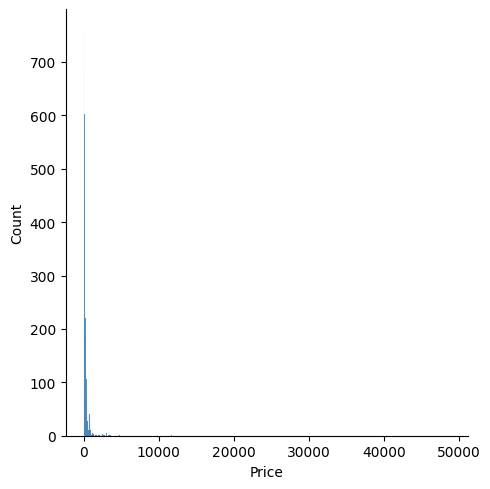

In [55]:
sns.displot(airbnb['Price'])

Text(0.5, 1.0, 'Top 10 Property Types available')

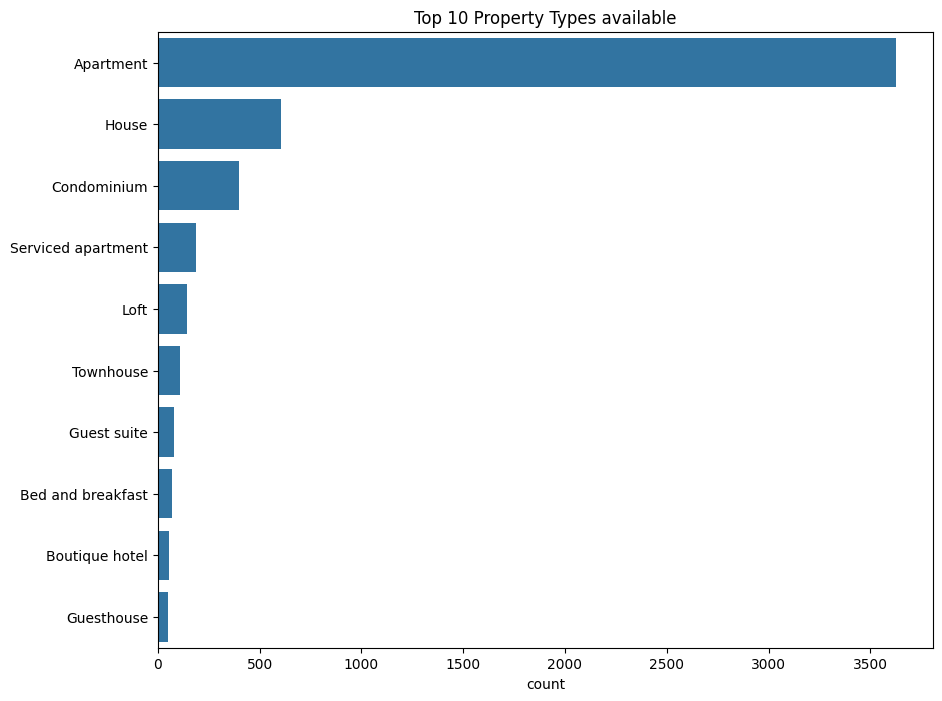

In [56]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=airbnb,y=airbnb.Property_type.values,order=airbnb.Property_type.value_counts().index[:10])
ax.set_title("Top 10 Property Types available")

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\2860588506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airbnb['Room_type'], y=airbnb['Price'],palette="Pastel2_r")


[(0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

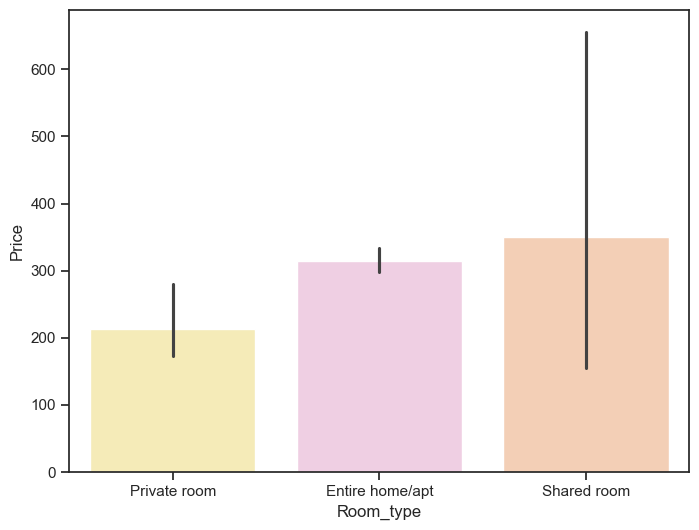

In [58]:
sns.set_theme(style="ticks")
plt.figure(figsize=(8,6))


sns.barplot(x=airbnb['Room_type'], y=airbnb['Price'],palette="Pastel2_r")
sns.color_palette('Pastel2_r')

Text(0.5, 1.0, 'Total Listings in each Room Type')

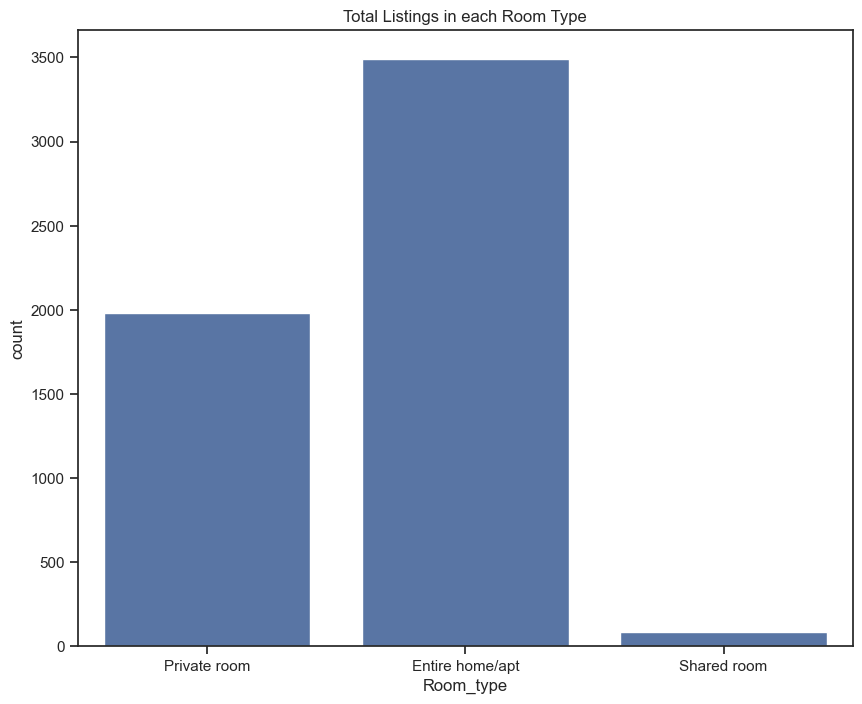

In [59]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=airbnb,x=airbnb['Room_type'])
ax.set_title("Total Listings in each Room Type")

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\17234300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airbnb['Price'], y=airbnb['Property_type'],palette="dark")


[(0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

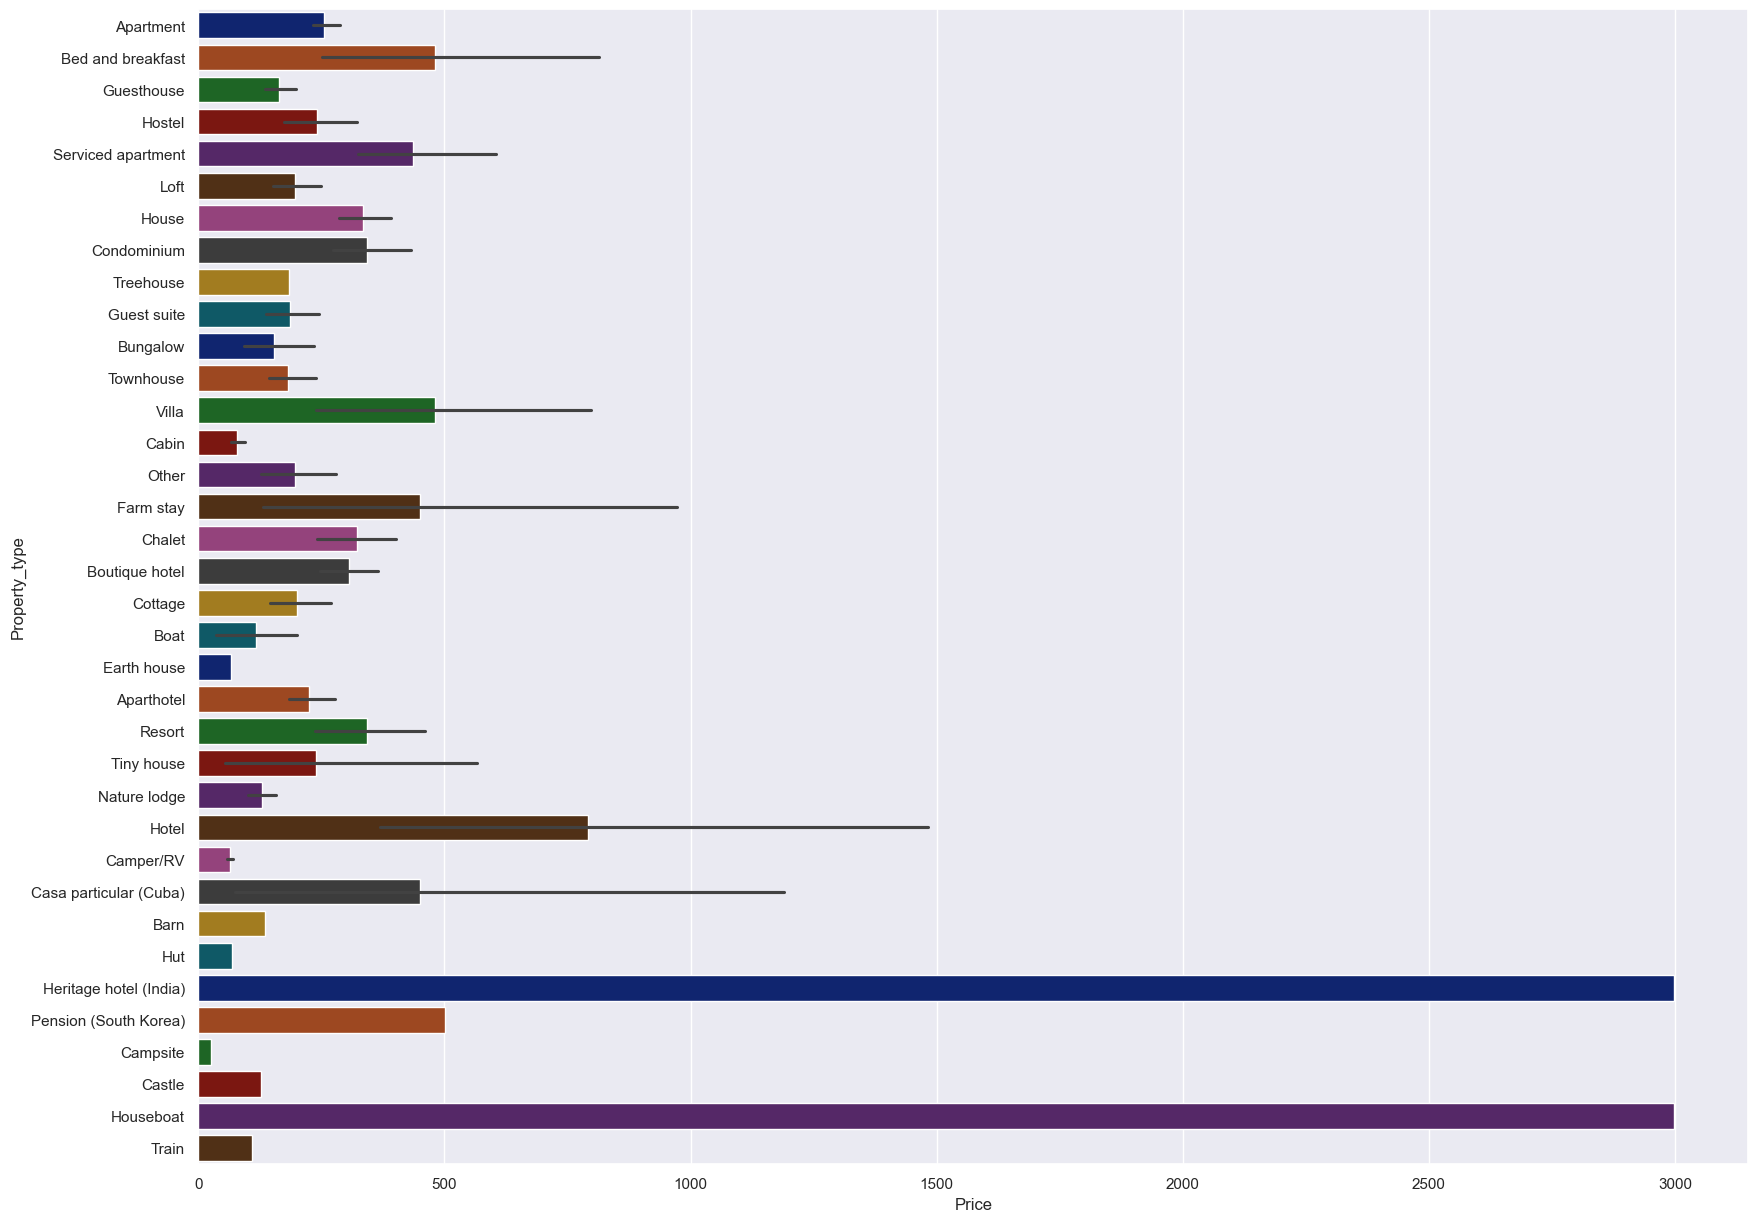

In [60]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,15))


sns.barplot(x=airbnb['Price'], y=airbnb['Property_type'],palette="dark")
sns.color_palette('Pastel2_r')

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_18820\1120244173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airbnb['Accommodates'], y=airbnb['Cleaning_fee'],palette="dark")


[(0.9450980392156862, 0.8862745098039215, 0.8),
 (1.0, 0.9490196078431372, 0.6823529411764706),
 (0.9019607843137255, 0.9607843137254902, 0.788235294117647),
 (0.9568627450980393, 0.792156862745098, 0.8941176470588236),
 (0.796078431372549, 0.8352941176470589, 0.9098039215686274),
 (0.9921568627450981, 0.803921568627451, 0.6745098039215687)]

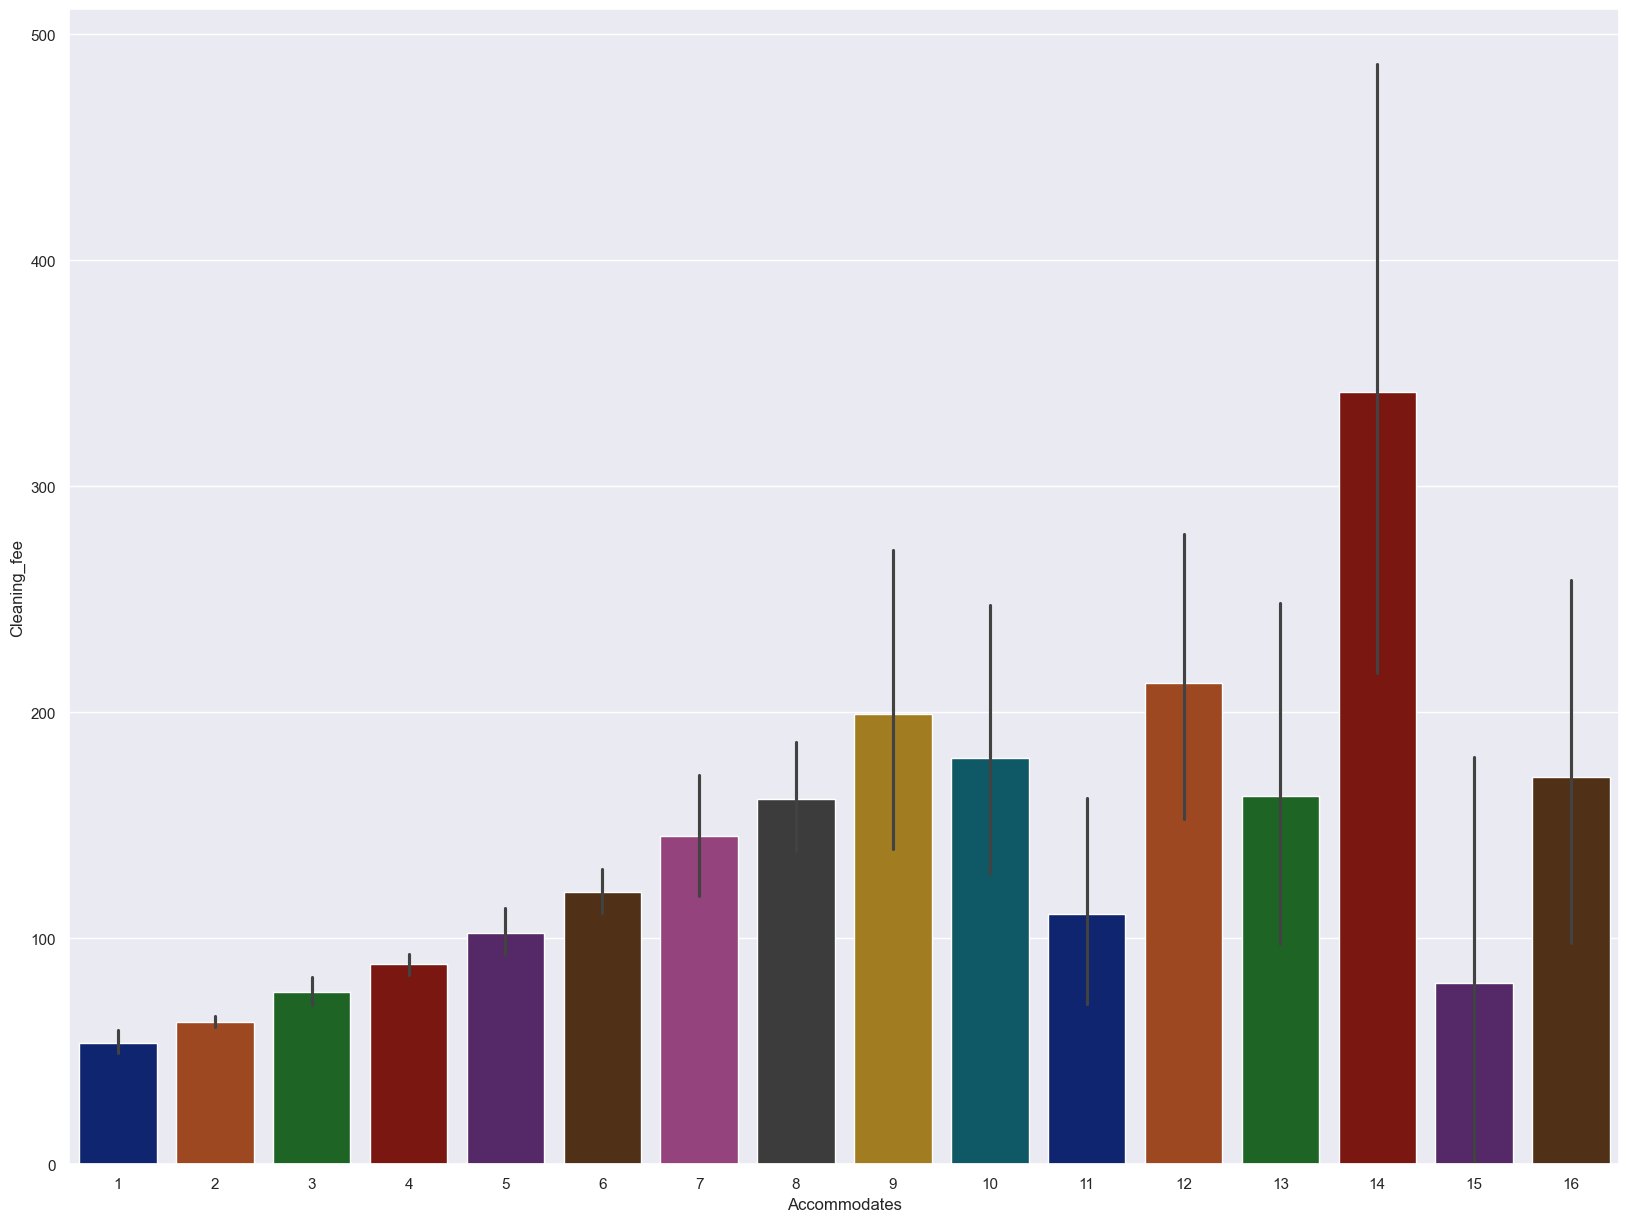

In [61]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,15))


sns.barplot(x=airbnb['Accommodates'], y=airbnb['Cleaning_fee'],palette="dark")
sns.color_palette('Pastel2_r')

In [70]:
airbnb['Country'].unique()

array(['United States', 'Turkey', 'Hong Kong', 'Australia', 'Portugal',
       'Brazil', 'Canada', 'Spain', 'China'], dtype=object)

In [62]:
plot=px.scatter(airbnb,x='Country',y='Price',title='Scatter plot Price across Countries')
plot.show()

In [63]:
Top_host=airbnb['Host_name'].value_counts().index[:10]

In [64]:
pie=px.pie(airbnb,names= 'Country',values='Review_scores',title='Pie chart')
pie.show()

Text(0.5, 1.0, 'Top 10 hosts with Highest listings')

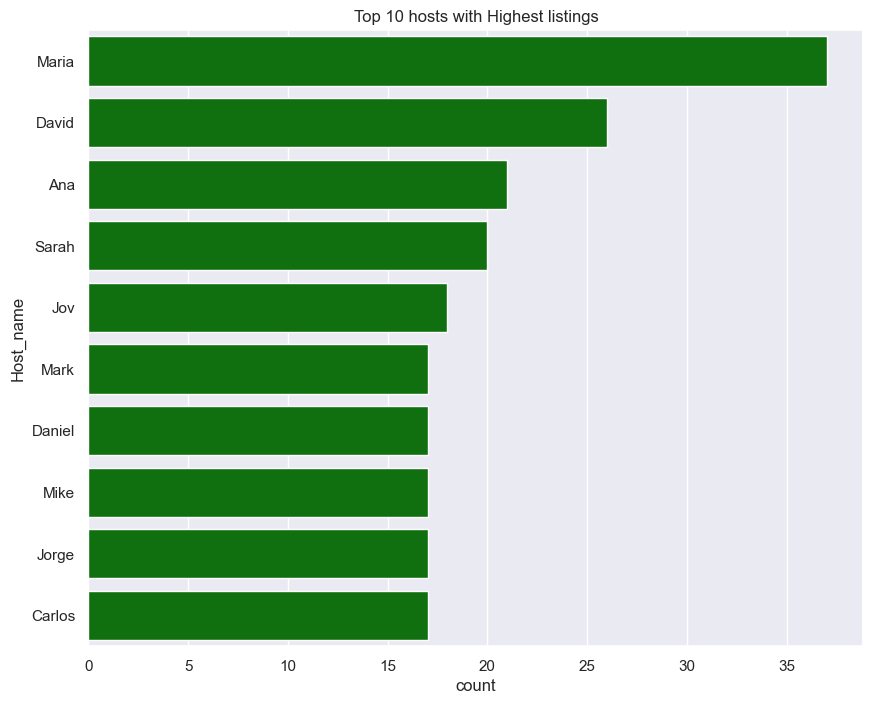

In [65]:
plt.figure(figsize=(10,8))
plot=sns.countplot(data=airbnb,y=airbnb.Host_name,order=airbnb.Host_name.value_counts().index[:10],color='green')
plot.set_title('Top 10 hosts with Highest listings')



In [66]:
country_data=airbnb.groupby('Country',as_index=False)['Price'].mean()
country_data

,Country,Price
0,Australia,197.806557
1,Brazil,525.346535
2,Canada,100.117103
3,China,405.368421
4,Hong Kong,773.786667
5,Portugal,69.181982
6,Spain,100.826224
7,Turkey,368.146747
8,United States,185.769231


In [67]:
fig = px.scatter(data_frame=country_data,
           x='Country',y='Price',
           color='Country',
           size='Price',
           opacity=1,
           size_max=35,
           title='Avg Listing Price in each Countries')
fig.show()

In [68]:
availability_1=airbnb.groupby('Country',as_index=False)['Availability_365'].mean()

In [69]:
availability_1

,Country,Availability_365
0,Australia,101.862295
1,Brazil,194.511551
2,Canada,109.627119
3,China,235.421053
4,Hong Kong,141.206667
5,Portugal,248.583784
6,Spain,176.731438
7,Turkey,255.521936
8,United States,165.721768


In [70]:
plot=px.scatter(data_frame=availability_1,
                x='Country',
                y='Availability_365',
                color='Country',
                size='Availability_365',
                opacity=1,
                size_max=35,
                title='Average availability in a Country')
plot.show()

In [71]:
pr_df = airbnb.groupby('Room_type',as_index=False)['Price'].mean().sort_values(by='Price')
fig = px.bar(data_frame=pr_df,x='Room_type',y='Price',color='Price')
fig.show()

In [72]:
airbnb['Amenities'] = airbnb['Amenities'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
airbnb['Amenities']

0       Internet,Wifi,Air conditioning,Kitchen,Elevato...
1       Internet,Wifi,Air conditioning,Free parking on...
2       Air conditioning,Kitchen,Smoking allowed,Doorm...
3       TV,Wifi,Air conditioning,Kitchen,Elevator,Firs...
4       TV,Wifi,Kitchen,Elevator,Heating,Washer,Dryer,...
                              ...                        
5550    TV,Cable TV,Internet,Wifi,Kitchen,Buzzer/wirel...
5551    TV,Wifi,Air conditioning,Pool,Kitchen,Free par...
5552    TV,Wifi,Air conditioning,Kitchen,Elevator,Hot ...
5553    TV,Internet,Wifi,Kitchen,Washer,Dryer,Smoke de...
5554    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: Amenities, Length: 5555, dtype: object

In [75]:
mydb=mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='airbnb')
mycursor=mydb.cursor(buffered=True)


In [ ]:
mycursor.execute('Create Database airbnb')

In [76]:
from sqlalchemy import create_engine

In [77]:
engine=create_engine('mysql+mysqlconnector://root:''@localhost/airbnb')

In [102]:
airbnb.to_sql(name='airbnb1',con=engine,if_exists='replace',index=False,chunksize=1000)

5555

In [78]:
table='airbnb1'
table

'airbnb1'

In [79]:
df=pd.read_sql_table(table,con=engine)
df

,_id,Listing_url,Name,Description,House_rules,Property_type,Room_type,Bed_type,Minimum_nights,Maximum_nights,...,Host_location,Host_total_listings_count,Street,Suburb,Country,Country_code,Latitude,Longitude,Availability_365,Review_scores
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,"Murphy bed, optional second bedroom available....",No smoking is permitted in the apartment. All ...,Apartment,Private room,Real Bed,12,360,...,"New York, New York, United States",3,"New York, NY, United States",Manhattan,United States,US,-73.96523,40.79962,93,94.0
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,We are on the central city Blue mosque 5 minu...,No House rules given,Bed and breakfast,Private room,Real Bed,1,1125,...,"Istanbul, İstanbul, Turkey",2,"Fatih , İstanbul, Turkey",Fatih,Turkey,TR,28.98009,41.0062,365,92.0
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",No House rules given,Apartment,Entire home/apt,Real Bed,4,20,...,"Hong Kong, Hong Kong",1,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western District,Hong Kong,HK,114.15027,22.28158,0,100.0
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"1. 禁止吸煙, 只限女生入住 (除得到批准) No smoking and only fe...",Guesthouse,Private room,Futon,1,500,...,United States,2,"Hong Kong , 九龍, Hong Kong",Sham Shui Po District,Hong Kong,HK,114.1669,22.3314,220,92.0
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...","No smoking: No smoking any substance, includi...",Apartment,Entire home/apt,Real Bed,10,21,...,"New South Wales, Australia",1,"Surry Hills, NSW, Australia",Darlinghurst,Australia,AU,151.21554,-33.88029,0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,9985696,https://www.airbnb.com/rooms/9985696,Kadıköy-Altıyol,Kadıköy merkezde 2+1 dairem vardır.Çok kalabal...,No House rules given,House,Entire home/apt,Real Bed,1,1125,...,"Kadikoy, Çanakkale, Turkey",2,"Kadıköy, İstanbul, Turkey",Moda,Turkey,TR,29.03079,40.98563,365,95.0
5551,9993190,https://www.airbnb.com/rooms/9993190,Just Steps from the Ocean at Premier Platinum ...,Relax Hawaiian Style in Gated Community on Oce...,"As a guest of Coconut Condos, I agree to the f...",Townhouse,Entire home/apt,Real Bed,3,365,...,"Lahaina, Hawaii, United States",58,"Lahaina, HI, United States",Lahaina,United States,US,-156.66752,20.85894,258,92.0
5552,9887054,https://www.airbnb.com/rooms/9887054,Quarry Bay fully furnished studio C,Newly renovated studio flat with full furniture.,No House rules given,Apartment,Private room,Real Bed,3,1125,...,Hong Kong,7,"Hong Kong, Hong Kong Island, Hong Kong",Quarry Bay,Hong Kong,HK,114.20722,22.29157,353,85.0
5553,9907907,https://www.airbnb.com/rooms/9907907,Large double room in Bondi,A bright large double room is available in a b...,We like to keep the flat clean and tidy so wou...,Apartment,Private room,Real Bed,3,1125,...,"Bondi Beach, New South Wales, Australia",1,"Bondi Beach, NSW, Australia",Bondi,Australia,AU,151.26542,-33.89298,0,95.0


In [80]:
Price=df.groupby('Property_type',as_index=False)['Price'].mean()
plot=px.bar(Price,x='Price',y='Property_type',title='Price distribution by Property',color_discrete_sequence=px.colors.sequential.Agsunset,color='Property_type')
plot.show()

   







In [82]:
plot=px.pie(df,values='Number_of_reviews',names='Cancellation_policy',hole=0.4,
            title='Reviews by Cancellation Policy')
plot.show()

In [84]:
sorted(df.Country.unique())

['Australia',
 'Brazil',
 'Canada',
 'China',
 'Hong Kong',
 'Portugal',
 'Spain',
 'Turkey',
 'United States']